In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

In [2]:
cat_cpi = pd.read_csv("CPI_Data/Cat_CPI&PPI/Cat_CPI.csv")
cat_cpi.set_index(pd.to_datetime(cat_cpi['Time'], format = '%Y%m'), inplace = True)
cat_cpi.drop(['Time'], axis = 1, inplace = True)
cat_cpi

,Food,Energy,Apparel,New vehicles,Medical care commodities,Tobacco and smoking products,Shelter,Transportation services
Time,,,,,,,,
2012-03-01,232.792,253.599,127.258,144.350,333.188,845.760,255.609,270.604
2012-04-01,233.234,255.736,128.485,144.522,333.060,847.032,256.031,272.146
2012-05-01,233.339,250.306,127.688,144.401,333.131,845.622,256.442,272.912
2012-06-01,233.563,244.167,125.241,144.367,333.348,849.078,256.950,273.239
2012-07-01,233.630,239.972,122.300,143.953,335.048,858.730,257.409,272.860
...,...,...,...,...,...,...,...,...
2021-08-01,279.135,246.639,121.194,158.652,375.685,1254.492,336.284,325.652
2021-09-01,281.506,248.228,123.406,160.244,376.842,1263.542,337.451,321.673
2021-10-01,284.205,255.338,124.323,162.527,379.003,1287.067,338.671,323.903


In [3]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

In [4]:
columns = cat_cpi.columns
for idx in range(cat_cpi.shape[1]):
    print(columns[idx])
    ind = cat_cpi.iloc[:, idx]
    adf_test(ind)
    print('\n')

Food
1. ADF :  2.2015850349133337
2. P-Value :  0.9988838066526566
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 105
5. Critical Values :
	 1% :  -3.4942202045135513
	 5% :  -2.889485291005291
	 10% :  -2.5816762131519275


Energy
1. ADF :  -2.5940258985873426
2. P-Value :  0.09423828973712362
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 116
5. Critical Values :
	 1% :  -3.4880216384691867
	 5% :  -2.8867966864160075
	 10% :  -2.5802408234244947


Apparel
1. ADF :  -1.8477040362530937
2. P-Value :  0.3570481195785644
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 105
5. Critical Values :
	 1% :  -3.4942202045135513
	 5% :  -2.889485291005291
	 10% :  -2.5816762131519275


New vehicles
1. ADF :  1.6197736740164312
2. P-Value :  0.9979157027200924
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Criti

<AxesSubplot:xlabel='Time'>

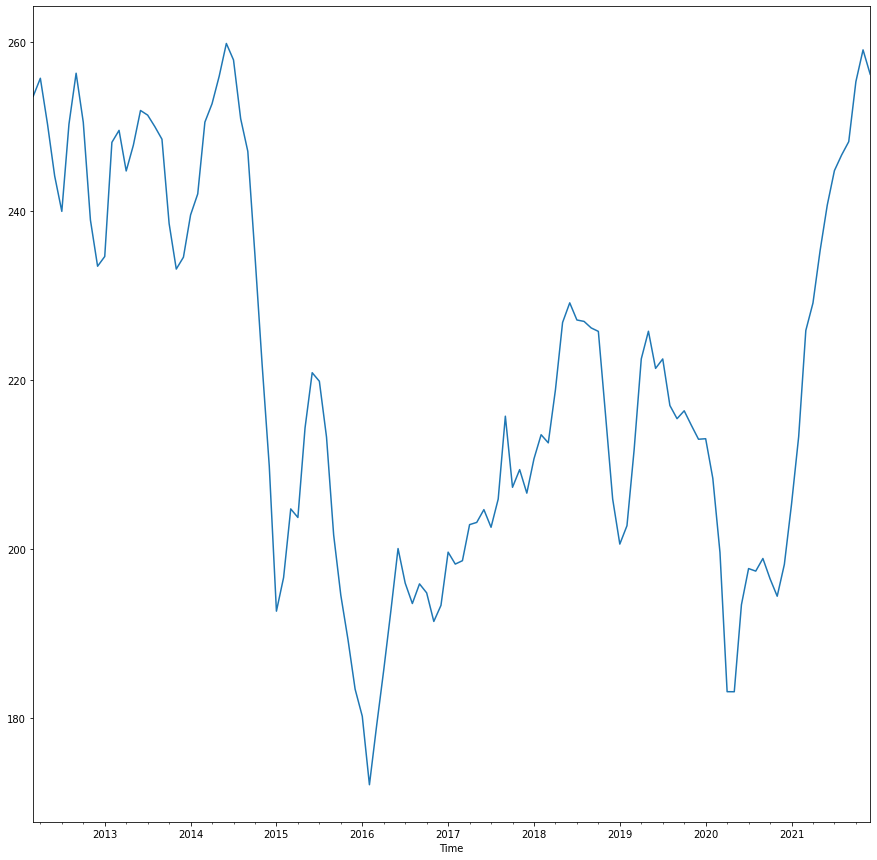

In [5]:
X = cat_cpi['Energy']
X.plot(figsize=(15,15))

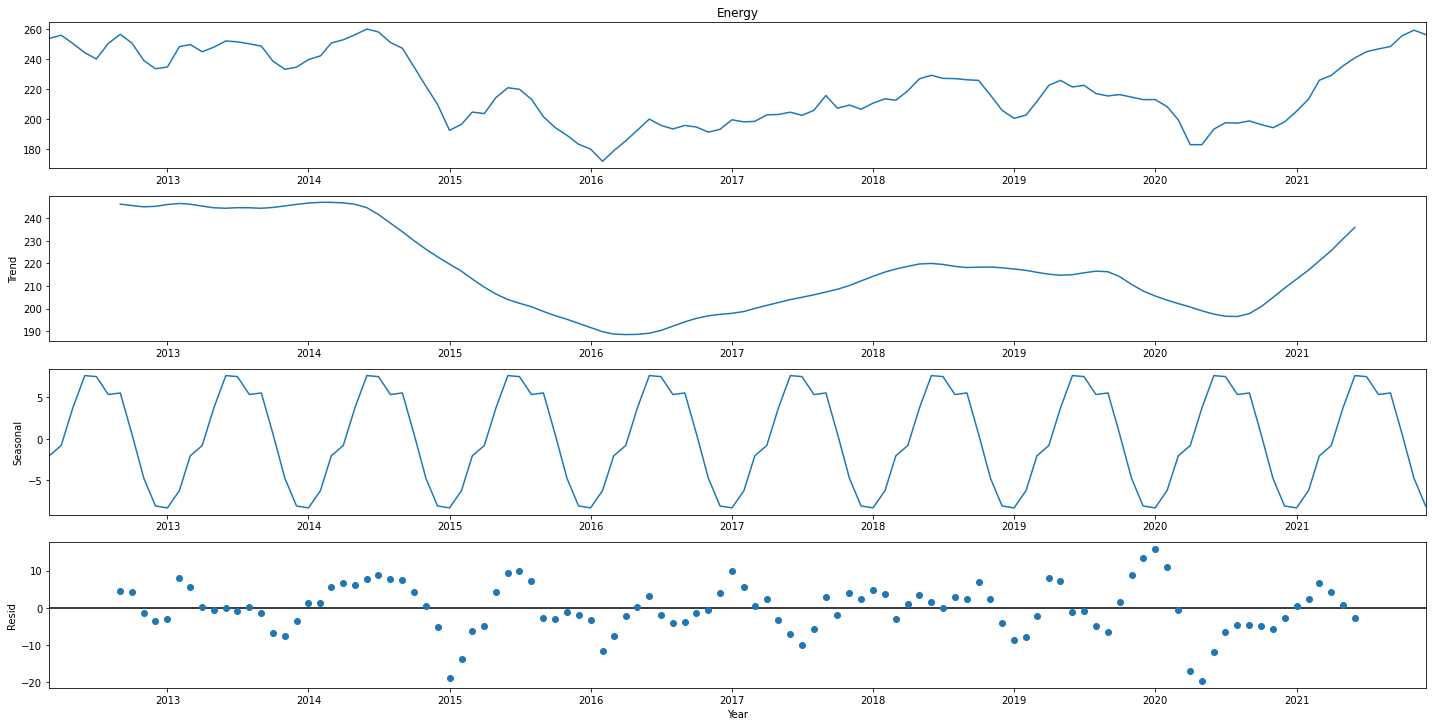

In [6]:
#From Victor's Github
#Break Into the trend, seasonality and noises of X

plt.rcParams["figure.figsize"] = (20,10)
decomposition = sm.tsa.seasonal_decompose(X, model = 'additive')
fig = decomposition.plot()
plt.xlabel('Year')
plt.show()


In [7]:
#Plot Trend

def Trend_Stationarity(x):

    moving_average = x.rolling(window = 12, center = False).mean()
    moving_std = x.rolling(window = 12, center = False).std()

    plt.plot(x, color = 'blue',label = 'Original Data')
    plt.plot(moving_average, color = 'red', linestyle='-.', label = 'Moving Average')
    plt.plot(moving_std, color ='black', linestyle='--', label = u'Standard Deviation')

    plt.xlabel('Year', fontsize = 18)
    plt.ylabel('CPI Index', fontsize = 18)
    plt.legend(loc='best', fontsize = 15)
    plt.title(u'Moving Average and Standard Deviation', fontsize = 25)
    plt.show()


In [8]:
r,q,p = sm.tsa.acf(X.values.squeeze(), qstat=True)
data = np.c_[range(1,21), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC           Q       Prob(>Q)
lag                                      
1.0   0.943323  107.695635   3.133920e-25
2.0   0.849651  195.818064   3.010563e-43
3.0   0.754701  265.949943   2.320960e-57
4.0   0.669973  321.703538   2.249478e-68
5.0   0.598482  366.587044   4.691034e-77
6.0   0.529066  401.975788   1.051231e-83
7.0   0.468359  429.959039   8.913612e-89
8.0   0.426807  453.408504   6.879894e-93
9.0   0.400355  474.230683   1.884780e-96
10.0  0.378945  493.058193   1.343106e-99
11.0  0.358535  510.069651  2.282044e-102
12.0  0.327884  524.431114  1.392099e-104
13.0  0.290812  535.836193  3.535207e-106
14.0  0.247361  544.167083  3.945919e-107
15.0  0.194315  549.357927  1.990838e-107
16.0  0.130310  551.715237  3.890843e-107
17.0  0.067986  552.363241  1.696387e-106
18.0  0.015460  552.397085  9.670851e-106
19.0 -0.016405  552.435576  5.341806e-105
20.0 -0.018216  552.483519  2.856932e-104


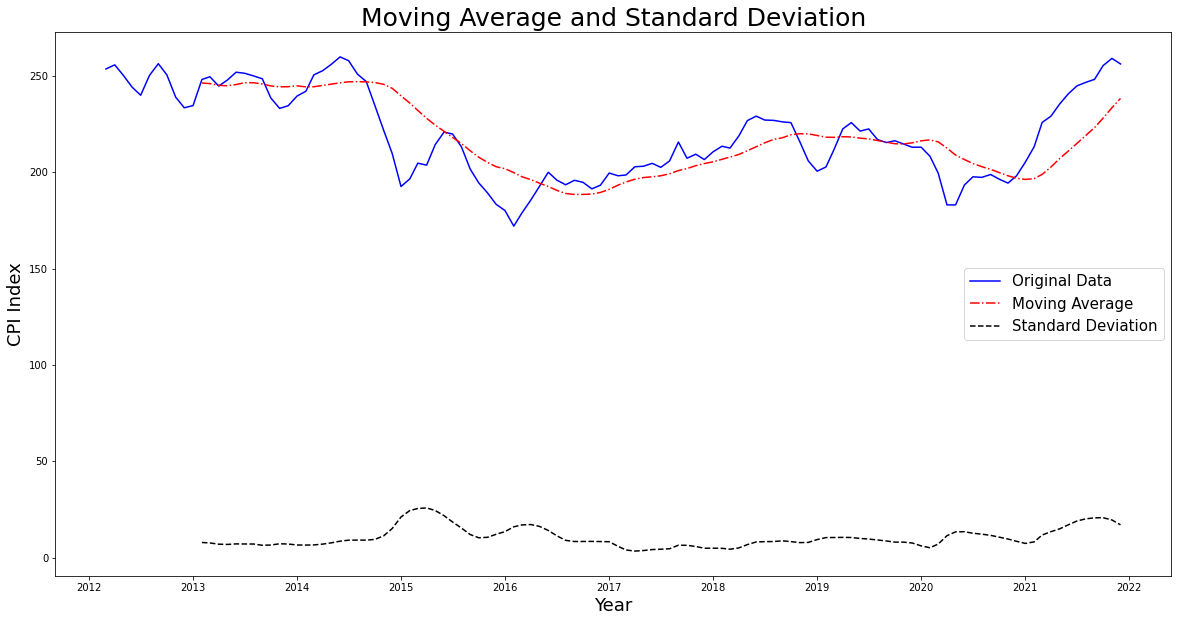

In [9]:
#We can see a trend in the moving average and standard deviation
Trend_Stationarity(X)

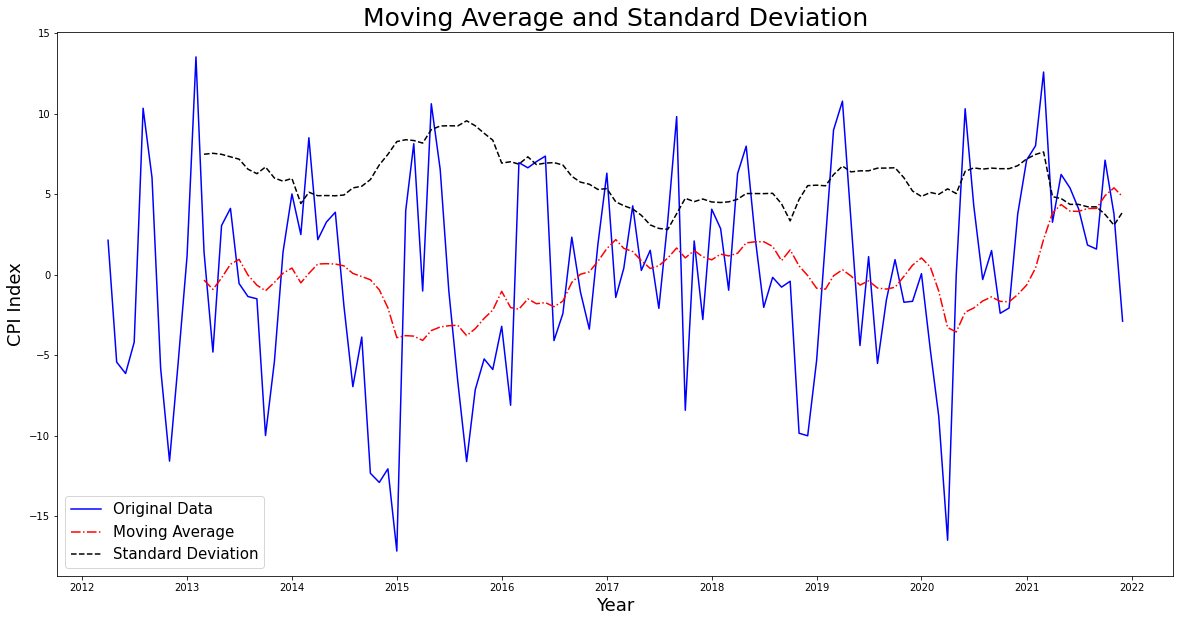

In [10]:
X = X.diff().dropna()
Trend_Stationarity(X)

In [11]:
# Reject the null, data is stational
adf_test(X)

1. ADF :  -6.428056788908791
2. P-Value :  1.7247298616158326e-08
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 116
5. Critical Values :
	 1% :  -3.4880216384691867
	 5% :  -2.8867966864160075
	 10% :  -2.5802408234244947


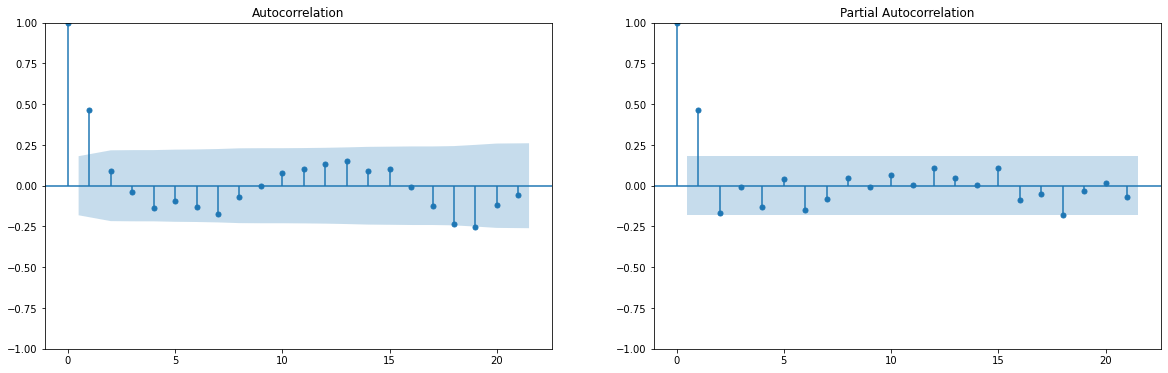

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plot_acf(X, ax = ax1)
plot_pacf(X, ax = ax2, method='ywmle')
plt.show()

In [13]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(X, seasonal=True,
                          suppress_warnings=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  117
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -363.402
Date:                Tue, 05 Apr 2022   AIC                            730.805
Time:                        11:08:16   BIC                            736.329
Sample:                             0   HQIC                           733.048
                                - 117                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5247      0.080      6.527      0.000       0.367       0.682
sigma2        29.1187      3.866      7.532      0.000      21.541      36.696
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.70   Prob(JB):                         0.98
Heteroskedasticity (H):               0.67   Skew:                            -0.04
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq_s = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
param_model = []
param_s_model = []
AIC_model = []
model_select = pd.DataFrame()
for param in pdq:
    for param_s in pdq_s:
        model = sm.tsa.statespace.SARIMAX(X,order=param,seasonal_order=param_s,enforce_stationarity=False,enforce_invertibility=False)
        model = model.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_s, model.aic))
        param_model.append(param)
        param_s_model.append(param_s)
        AIC_model.append(model.aic)
model_select['pdq'] = param_model
model_select['pdq_x_PDQs'] = param_s_model
model_select['aic'] = AIC_model
print(model_select[model_select['aic'] == model_select['aic'].min()])

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:754.6840917583453
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:672.2279169696236
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:729.1400425494677
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:609.6828524230333
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:677.803838587614
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:673.5354122790254
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:633.4067733122232
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:609.1223371237023
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:719.0373973756876
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:642.0050505354391
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:705.323193119591
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:581.9532653564153
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:653.5158433234026
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:643.9359646974386
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:613.5023230699243
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:582.5300260608007
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:755.0430137703329
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:668.2002275696169
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:743.222345773

In [15]:
cat_cpi.shape[0]

118

In [16]:

train = X.iloc[:-15]
test = X.iloc[-15:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(102,) (15,)
-2.4000000000000057 -2.893000000000029


In [17]:
model=SARIMAX(train,order=(0,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Energy   No. Observations:                  102
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -319.166
Date:                Tue, 05 Apr 2022   AIC                            642.331
Time:                        11:08:19   BIC                            647.581
Sample:                    04-01-2012   HQIC                           644.457
                         - 09-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5153      0.087      5.939      0.000       0.345       0.685
sigma2        30.4853      4.369      6.978      0.000      21.922      39.048
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.88   Prob(JB):                         0.98
Heteroskedasticity (H):               0.72   Skew:                             0.03
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
start= len(train)
end=len(train)+len(test)-1

index_future_dates = pd.date_range(start='2021-09',end='2021-12', freq='M')
pred = model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')

In [19]:
preds = pd.concat([train, test], axis = 0)

<AxesSubplot:xlabel='Time'>

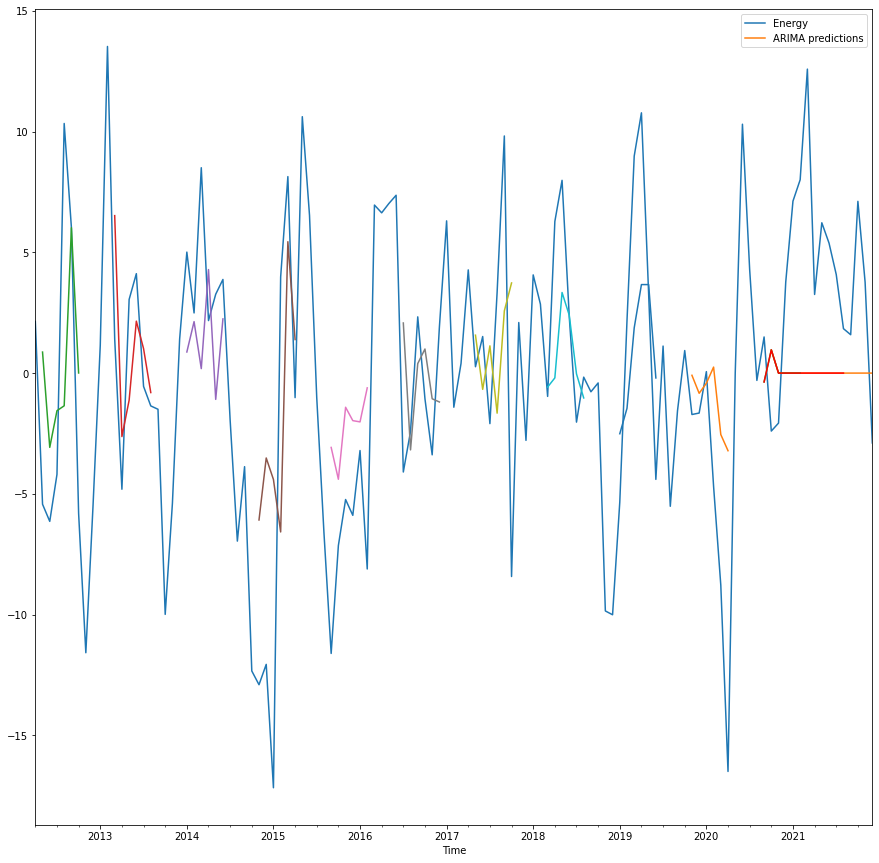

In [20]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
preds.plot(legend = True, ax = ax)
pred.plot(legend=True, ax=ax)
for i in np.arange(1, train.shape[0], 10):
    pred_r = model.predict(start=i, end = i+5, typ='level')
    pred_r.plot(legend=False, ax=ax)
pred_f = model.predict(start=train.shape[0]-1,end=train.shape[0]+10,typ='levels').rename('ARIMA predictions on Test Set')
pred_f.plot(ax=ax, color = "red")

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_mean = test.mean()
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)
print(rmse / test_mean)

5.637693170980426
1.4745749283284173


In [22]:
model2 =SARIMAX(train, order = (1,0,1), seasonal_order=(1,1,1,12))
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Energy   No. Observations:                  102
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -290.283
Date:                            Tue, 05 Apr 2022   AIC                            590.566
Time:                                    11:08:20   BIC                            603.065
Sample:                                04-01-2012   HQIC                           595.607
                                     - 09-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1119      0.256     -0.438      0.662      -0.613       0.389
ma.L1          0.5617      0.220      2.555      0.011       0.131       0.993
ar.S.L12      -0.0315      0.193     -0.163      0.870      -0.411       0.348
ma.S.L12      -0.9988     42.501     -0.024      0.981     -84.300      82.302
sigma2        27.6192   1171.153      0.024      0.981   -2267.799    2323.038
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.87
Prob(Q):                              1.00   Prob(JB):                         0.14
Heteroskedasticity (H):               0.87   Skew:                            -0.51
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
pred2 = model2.predict(start=start,end=end,typ='levels').rename('SARIMAX predictions')

<AxesSubplot:xlabel='Time'>

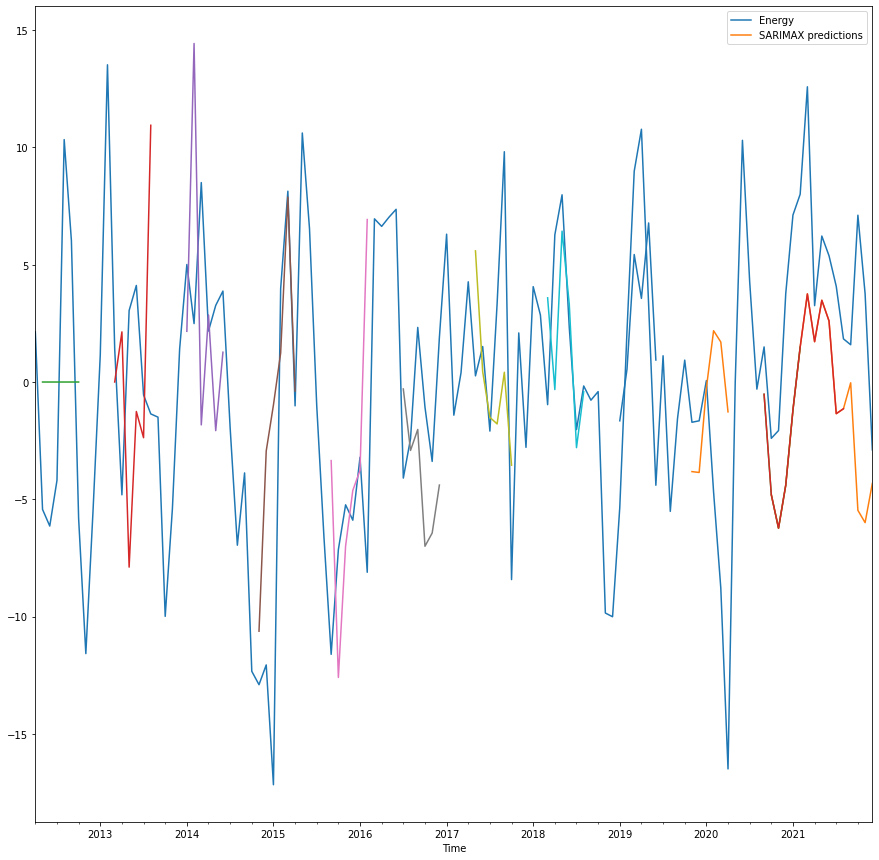

In [24]:
fig2, ax2 = plt.subplots(1,1, figsize=(15,15))
preds.plot(legend = True, ax = ax2)
pred2.plot(legend=True, ax=ax2)
for i in np.arange(1, train.shape[0], 10):
    pred_r = model2.predict(start=i, end = i+5, typ='level')
    pred_r.plot(legend=False, ax=ax2)
pred_f = model2.predict(start=train.shape[0]-1,end=train.shape[0]+10,typ='levels').rename('SARIMAX predictions')
pred_f.plot()

In [25]:
test_mean = test.mean()
rmse=sqrt(mean_squared_error(pred2,test))
print(rmse)
print(rmse / test_mean)

6.288471999966851
1.6447903189158097


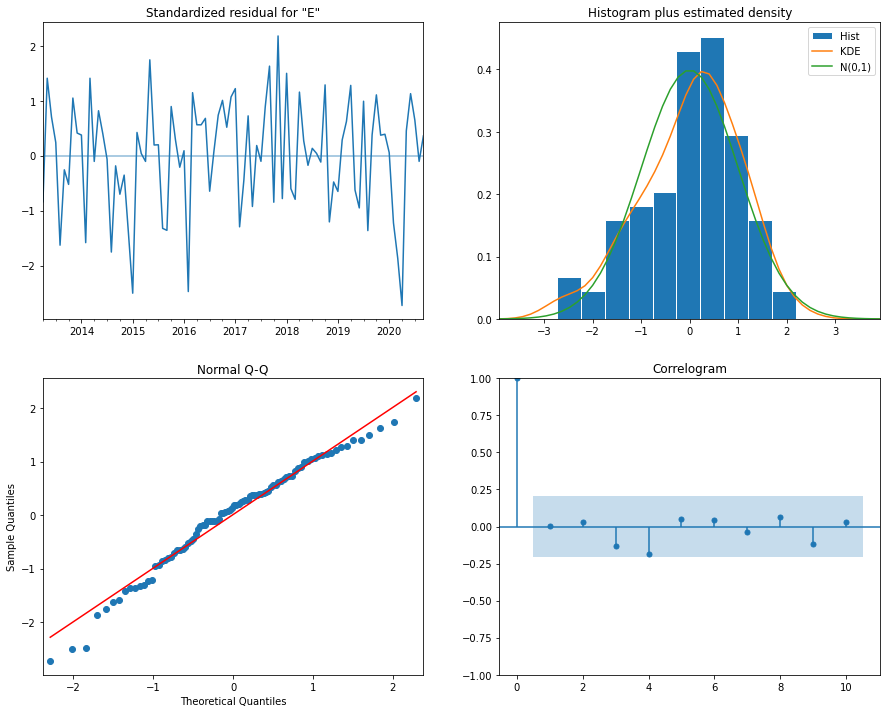

            AC          Q  Prob(>Q)
lag                                
1.0   0.033585   0.118472  0.730698
2.0  -0.061854   0.524331  0.769384
3.0  -0.197217   4.691922  0.195797
4.0  -0.110756   6.019739  0.197679
5.0   0.105633   7.240023  0.203393
6.0   0.058871   7.622999  0.267044
7.0  -0.118237   9.184053  0.239711
8.0   0.007447   9.190312  0.326497
9.0  -0.041923   9.390787  0.402011
10.0  0.102214  10.595449  0.389892
11.0  0.027815  10.685637  0.469963
12.0 -0.067579  11.223925  0.509832
13.0  0.064291  11.716580  0.551010
14.0 -0.025697  11.796179  0.622667
15.0  0.121708  13.602334  0.555877
16.0  0.011197  13.617799  0.627163
17.0  0.002564  13.618619  0.693890
18.0 -0.016686  13.653781  0.751366
19.0 -0.064164  14.179972  0.773101
20.0  0.013331  14.202962  0.820058


In [26]:
#Diagnose Model
model2.plot_diagnostics(figsize=(15, 12))
plt.show()

#LB Test
r,q,p = sm.tsa.acf(model2.resid.values.squeeze(), qstat=True)
data = np.c_[range(1,21), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

In [27]:
#Reverse Prediction
pred_t = model2.predict(start=0,end=train.shape[0]+test.shape[0]-1,typ='levels').rename('SARIMAX predictions')
predicted_index = pd.DataFrame({'index':cat_cpi['Energy'], 'Changes From Last Month': pred_t})
x, x_dif = predicted_index['index'].iloc[0], predicted_index['Changes From Last Month'].iloc[1:]
predicted_index['predicted reverse'] = np.r_[x, x_dif].cumsum().astype(float)
predicted_index

,index,Changes From Last Month,predicted reverse
2012-03-01,253.599,NaN,253.599000
2012-04-01,255.736,0.000000,253.599000
2012-05-01,250.306,0.000052,253.599052
2012-06-01,244.167,-0.000138,253.598914
2012-07-01,239.972,-0.000134,253.598780
...,...,...,...
2021-08-01,246.639,-1.138999,192.761632
2021-09-01,248.228,-0.032866,192.728766
2021-10-01,255.338,-5.469728,187.259038
2021-11-01,259.100,-5.993317,181.265721


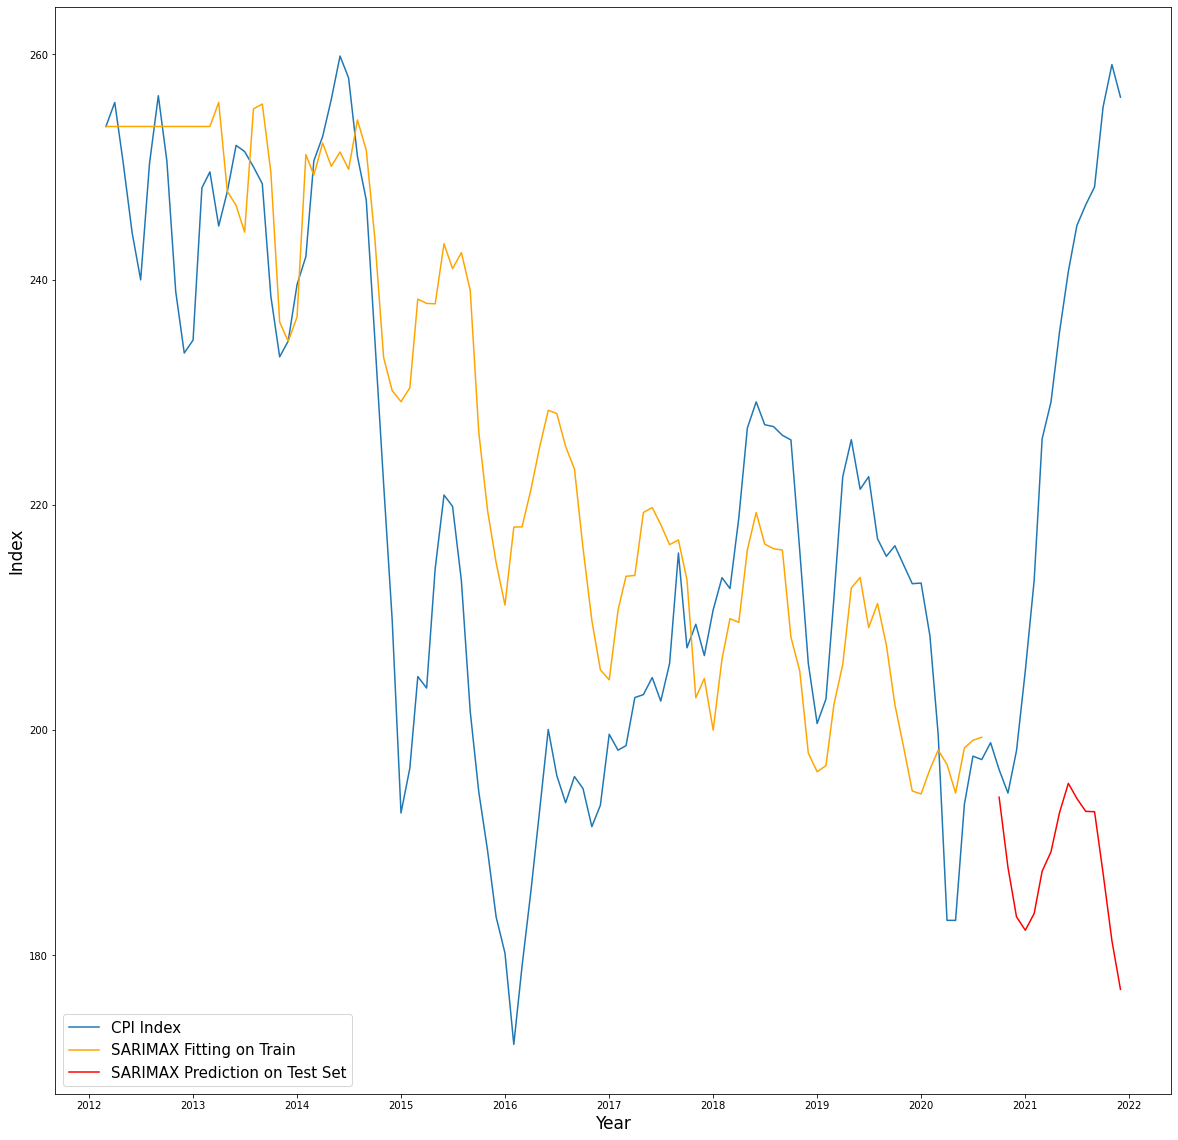

In [28]:
#Plot Train and Test Prediction

fig, ax = plt.subplots(1,1, figsize=(20,20))
ax.plot(predicted_index['index'], label ='CPI Index')
ax.plot(predicted_index['predicted reverse'].iloc[:train.shape[0]], color = 'orange', label = 'SARIMAX Fitting on Train')
ax.plot(predicted_index['predicted reverse'].iloc[train.shape[0]+1:], color = 'red', label = 'SARIMAX Prediction on Test Set')
ax.set_xlabel("Year", fontsize = 17)
ax.set_ylabel("Index", fontsize = 17)
ax.legend(fontsize = 15)

In [29]:
CPI = pd.read_csv("CPI_Data/Merged_Data/Merged_CPI.csv")
CPI.set_index('Unnamed: 0', inplace = True)
CPI.index = pd.to_datetime(CPI.index, format = '%Y%m')
X = CPI['All items']
X = X.dropna()

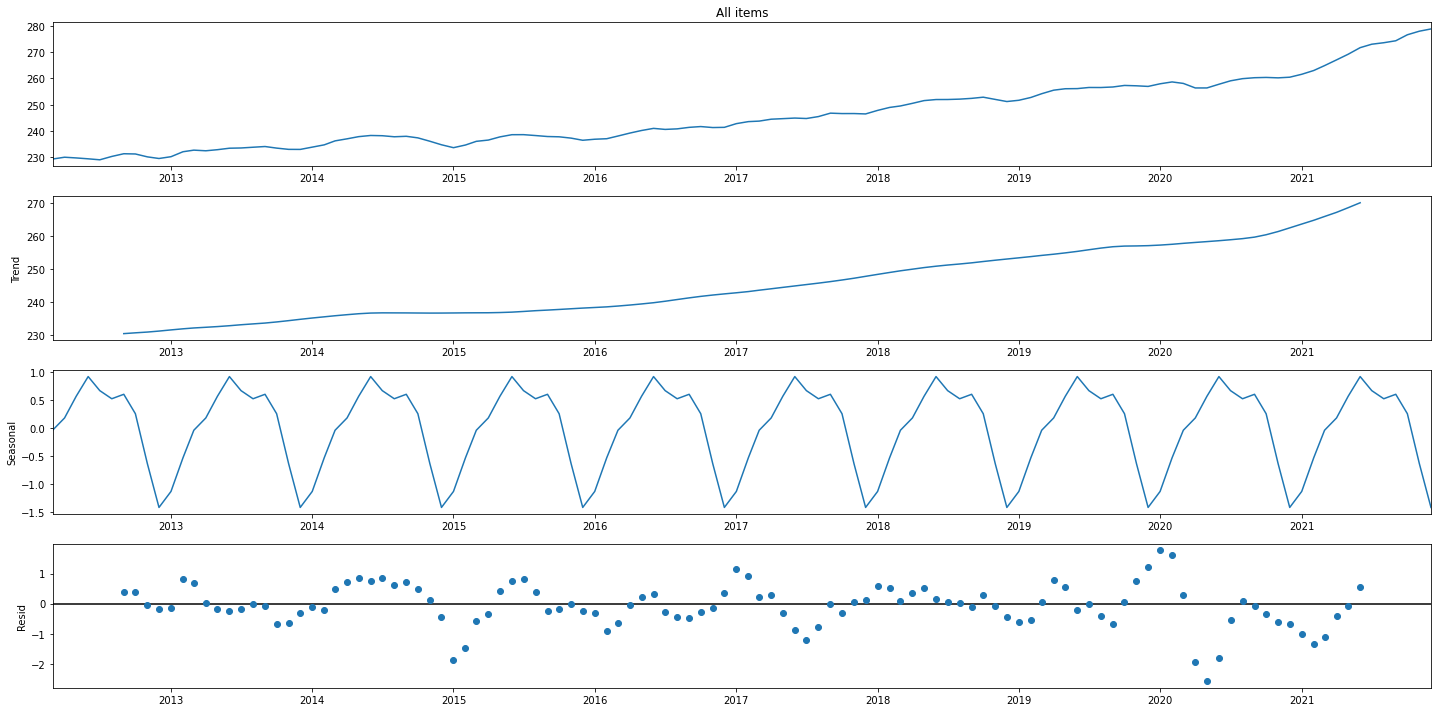

In [30]:
plt.rcParams["figure.figsize"] = (20,10)
decomp = sm.tsa.seasonal_decompose(X, model = 'additive')
fig_all = decomp.plot()
plt.show()

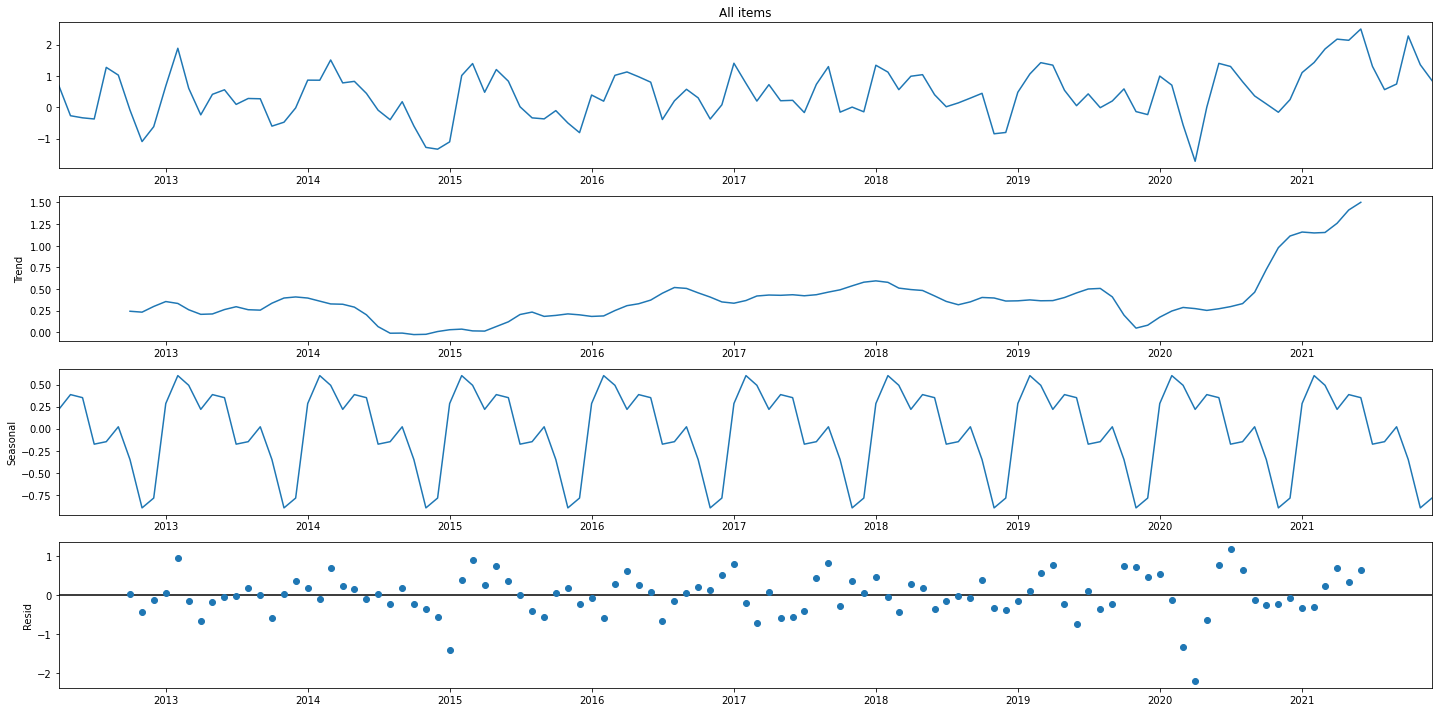

In [31]:
X = X.diff().dropna()
plt.rcParams["figure.figsize"] = (20,10)
decomp = sm.tsa.seasonal_decompose(X, model = 'additive')
fig_all = decomp.plot()
plt.show()

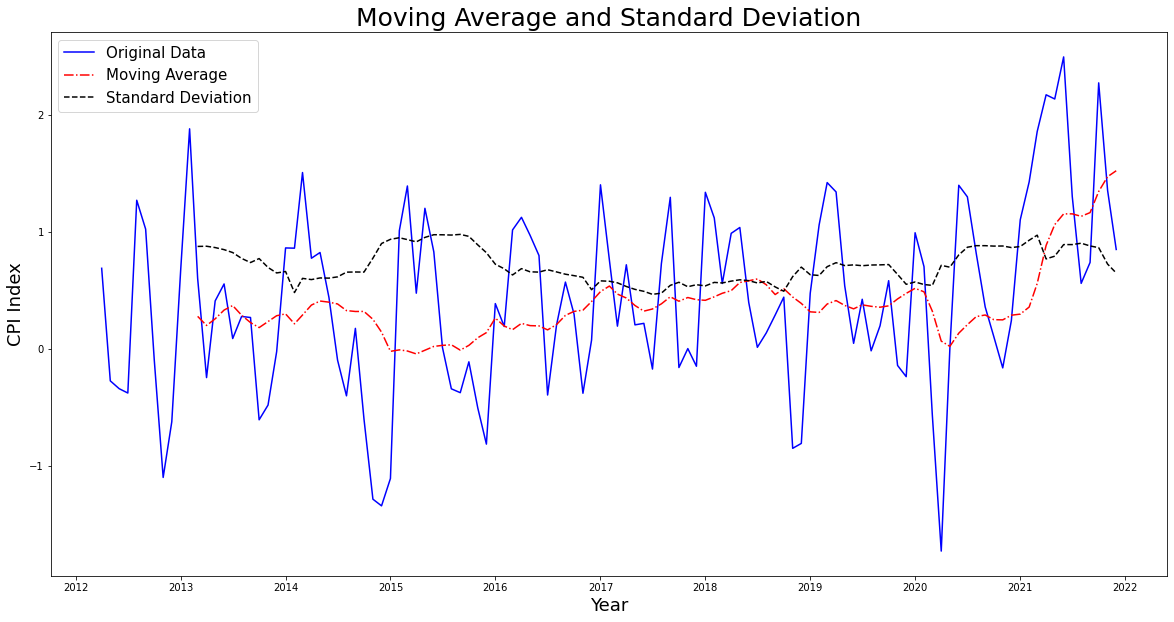

In [32]:
Trend_Stationarity(X)

In [33]:
train_all = X[:train.shape[0]]
test_all = X[train.shape[0]:]

In [41]:
train_all

Unnamed: 0
2012-04-01    0.693
2012-05-01   -0.270
2012-06-01   -0.337
2012-07-01   -0.374
2012-08-01    1.275
              ...  
2020-05-01    0.005
2020-06-01    1.403
2020-07-01    1.304
2020-08-01    0.817
2020-09-01    0.362
Name: All items, Length: 102, dtype: float64

In [34]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq_s = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
param_model = []
param_s_model = []
AIC_model = []
model_select = pd.DataFrame()
for param in pdq:
    for param_s in pdq_s:
        model = sm.tsa.statespace.SARIMAX(train_all,order=param,seasonal_order=param_s,enforce_stationarity=False,enforce_invertibility=False)
        model = model.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_s, model.aic))
        param_model.append(param)
        param_s_model.append(param_s)
        AIC_model.append(model.aic)
model_select['pdq'] = param_model
model_select['pdq_x_PDQs'] = param_s_model
model_select['aic'] = AIC_model
print(model_select[model_select['aic'] == model_select['aic'].min()])

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:236.6681587739134
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:187.8601622796353
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:204.1076974097968
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:162.09652607014
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:183.1683072274758
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:182.85760869534417
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:174.74945660732126
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:163.32941568864203
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:190.37835569375537
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:159.55427202451594
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:184.95527239374354
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:136.32127680724653
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:158.60558795940577
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:156.17069343617655
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:151.75871432143498
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:141.17681609420077
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:224.09297484740526
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:184.23387111010177
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:

In [35]:
model_all = SARIMAX(train_all, order = (0,0,1), seasonal_order = (0,1,1,12))
model_all = model_all.fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          All items   No. Observations:                  102
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                 -81.038
Date:                            Tue, 05 Apr 2022   AIC                            168.076
Time:                                    11:08:27   BIC                            175.576
Sample:                                04-01-2012   HQIC                           171.101
                                     - 09-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5550      0.105      5.277      0.000       0.349       0.761
ma.S.L12      -0.9810      1.948     -0.504      0.615      -4.799       2.837
sigma2         0.2703      0.519      0.521      0.603      -0.747       1.288
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.39
Prob(Q):                              0.94   Prob(JB):                         0.02
Heteroskedasticity (H):               1.08   Skew:                            -0.67
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
pred_all = model_all.predict(start=0,end=train.shape[0],typ='levels').rename('SARIMAX predictions')

<AxesSubplot:xlabel='Unnamed: 0'>

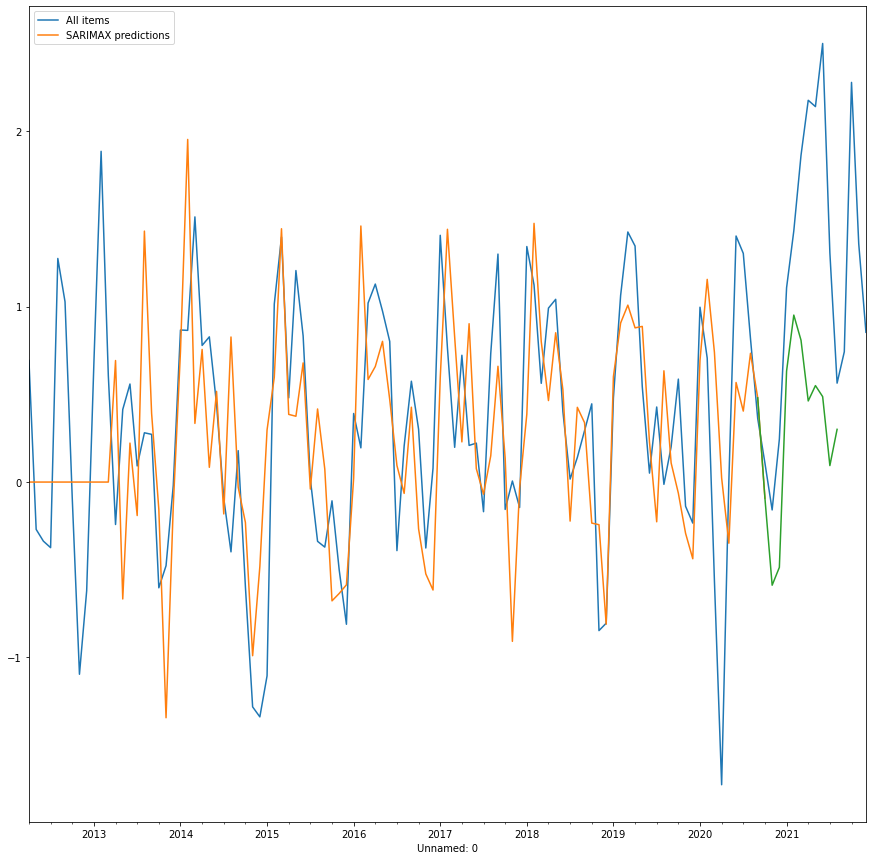

In [37]:
fig_a, ax_a = plt.subplots(1,1, figsize=(15,15))
X.plot(legend = True, ax = ax_a)
pred_all.plot(legend=True, ax=ax_a)

pred_f_a = model_all.predict(start=train.shape[0]-1,end=train.shape[0]+10,typ='levels').rename('SARIMAX predictions')
pred_f_a.plot()

In [38]:
#Reverse Prediction
pred_t_all = model_all.predict(start=0,end=train.shape[0]+test.shape[0]-1,typ='levels').rename('SARIMAX predictions')
predicted_index = pd.DataFrame({'index':CPI['All items'].dropna(), 'Changes From Last Month': pred_t_all})
x, x_dif = predicted_index['index'].iloc[0], predicted_index['Changes From Last Month'].iloc[1:]
predicted_index['predicted reverse'] = np.r_[x, x_dif].cumsum().astype(float)
predicted_index

,index,Changes From Last Month,predicted reverse
2012-03-01,229.392,NaN,229.392000
2012-04-01,230.085,0.000000e+00,229.392000
2012-05-01,229.815,2.040057e-07,229.392000
2012-06-01,229.478,-7.948279e-08,229.392000
2012-07-01,229.104,-9.920620e-08,229.392000
...,...,...,...
2021-08-01,273.567,3.005805e-01,257.885681
2021-09-01,274.310,4.264520e-01,258.312133
2021-10-01,276.589,-3.368081e-02,258.278453
2021-11-01,277.948,-5.882298e-01,257.690223


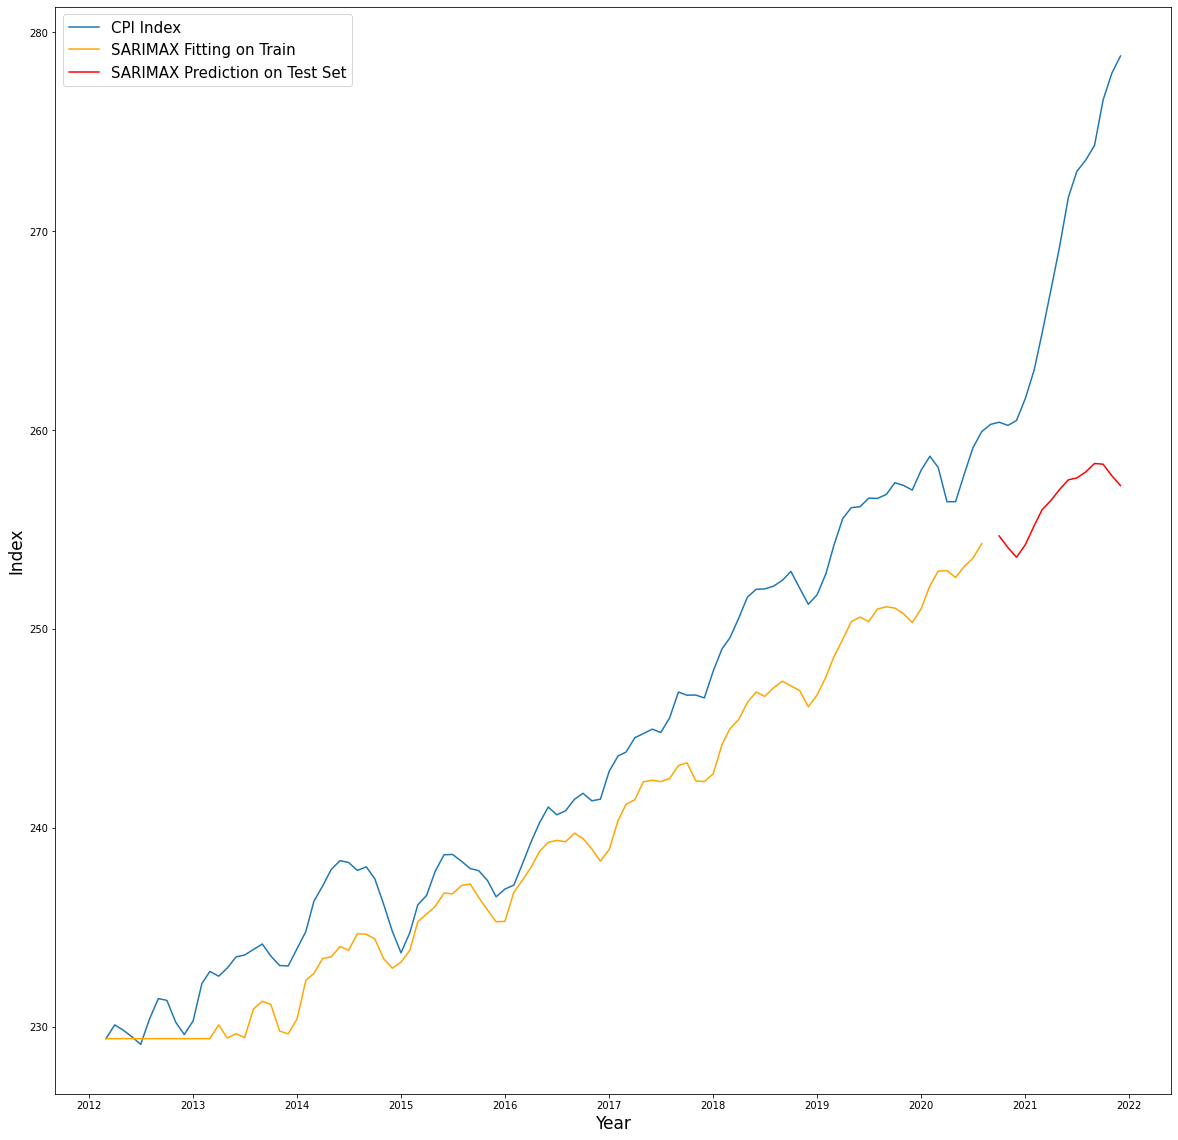

In [39]:
#Plot Train and Test Prediction

fig3, ax3 = plt.subplots(1,1, figsize=(20,20))
ax3.plot(predicted_index['index'], label ='CPI Index')
ax3.plot(predicted_index['predicted reverse'].iloc[:train.shape[0]], color = 'orange', label = 'SARIMAX Fitting on Train')
ax3.plot(predicted_index['predicted reverse'].iloc[train.shape[0]+1:], color = 'red', label = 'SARIMAX Prediction on Test Set')
ax3.set_xlabel("Year", fontsize = 17)
ax3.set_ylabel("Index", fontsize = 17)
ax3.legend(fontsize = 15)

In [40]:
rmse = sqrt(mean_squared_error(predicted_index['index'], predicted_index['predicted reverse']))
print(rmse)

5.950096607539039
